In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
from sklearn.model_selection import ShuffleSplit

Using TensorFlow backend.


In [3]:
def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [120]:
all_datasets = 'C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Paper_2_Aditya\\Dataset\\'
df = pd.read_csv(all_datasets + 'matmul_physical.csv')

In [121]:
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)

In [122]:
encoded_data_frame.head()

,arch,ps,num-cpus,runtime,power,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,...,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type_1,mem-type_2,mem_clock,num-cpu,bus_speed
0,cep002,100,1,958.0853,25.774741,3.168,1,8,64,1,...,16,64,6,12288,16,1,0,2666,6,4096
1,cep002,100,10,2034.8911,42.109035,3.168,1,8,64,1,...,16,64,6,12288,16,1,0,2666,6,4096
2,cep002,100,11,3965.8928,47.193510,3.168,1,8,64,1,...,16,64,6,12288,16,1,0,2666,6,4096
3,cep002,100,12,3467.8764,41.905992,3.168,1,8,64,1,...,16,64,6,12288,16,1,0,2666,6,4096
4,cep002,100,2,547.6646,22.879879,3.168,1,8,64,1,...,16,64,6,12288,16,1,0,2666,6,4096


In [123]:
total_data = encoded_data_frame.drop(columns = ['arch'])

In [124]:
total_data = total_data.fillna(0)

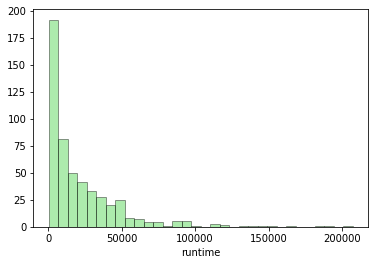

In [125]:
sns_plot = sns.distplot(total_data['runtime'], hist=True, kde=False, 
            color = 'limegreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns_plot.figure.savefig("matmul_physical_runtime.png")

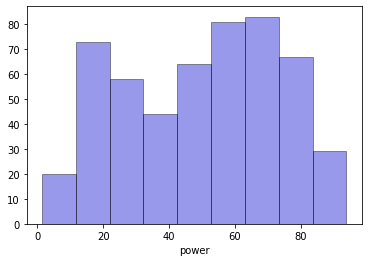

In [126]:
sns_plot_2 = sns.distplot(total_data['power'], hist=True, kde=False, 
            color = 'mediumblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns_plot_2.figure.savefig("matmul_physical_power.png")